Predictive Analysis: Mushrooms

Section 2: Python Code: Exploratory Data Analysis & Classification Algorithms on Mushroom Dataset


In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the dataset
mushrooms_df = pd.read_csv('mushrooms.csv')

In [ ]:
print(mushrooms_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# Check for duplicates
duplicates = mushrooms_df.duplicated()

# Count duplicate rows
duplicate_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
#missing values
missing_values = mushrooms_df.isnull().sum()
# Display the cleaned data and missing value summary
mushrooms_df.head(), missing_values

(  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
 0     p         x           s         n       t    p               f   
 1     e         x           s         y       t    a               f   
 2     e         b           s         w       t    l               f   
 3     p         x           y         w       t    p               f   
 4     e         x           s         g       f    n               f   
 
   gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
 0            c         n          k  ...                        s   
 1            c         b          k  ...                        s   
 2            c         b          n  ...                        s   
 3            c         n          n  ...                        s   
 4            w         b          k  ...                        s   
 
   stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
 0                      w                      w         p       

In [ ]:
#Summary statistics for categorical features
print("\nSummary statistics for categorical features:")
for column in mushrooms_df.columns:
    if mushrooms_df[column].dtype == 'object':
        print(f"\nFrequency counts for {column}:\n", mushrooms_df[column].value_counts())


Summary statistics for categorical features:

Frequency counts for class:
 class
e    4208
p    3916
Name: count, dtype: int64

Frequency counts for cap-shape:
 cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

Frequency counts for cap-surface:
 cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

Frequency counts for cap-color:
 cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

Frequency counts for bruises:
 bruises
f    4748
t    3376
Name: count, dtype: int64

Frequency counts for odor:
 odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

Frequency counts for gill-attachment:
 gill-attachment
f    7914
a     210
Name: count, dtype: int64

Frequency counts for gill-spacing:
 gill-spacing
c    6812
w    1312
Name: count, dtype: int64

Frequency counts for gi

Visualisation

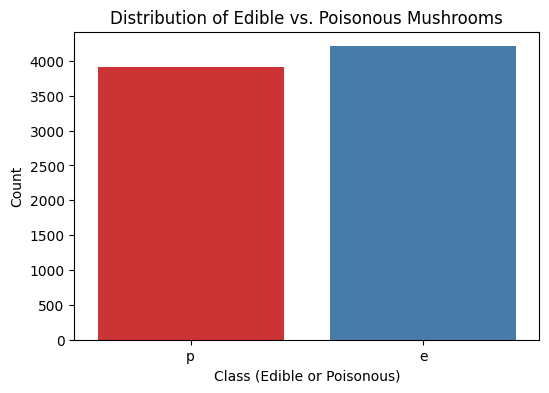

In [ ]:
#Visualization of distribution of the target variable ('class')
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=mushrooms_df, hue='class', palette='Set1')
plt.title("Distribution of Edible vs. Poisonous Mushrooms")
plt.xlabel("Class (Edible or Poisonous)")
plt.ylabel("Count")
plt.show()

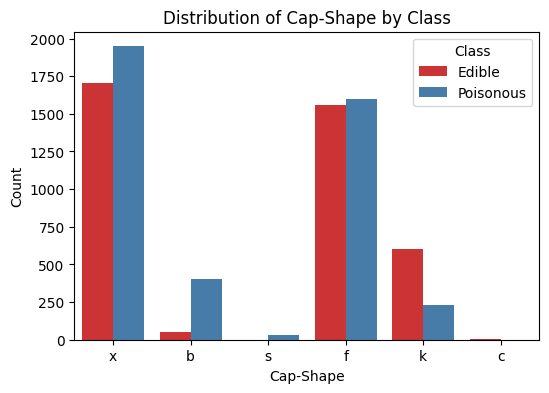

In [ ]:
# Distribution of categorical features (e.g., 'cap-shape')
plt.figure(figsize=(6, 4))
sns.countplot(x='cap-shape', data=mushrooms_df, hue='class', palette='Set1')
plt.title("Distribution of Cap-Shape by Class")
plt.xlabel("Cap-Shape")
plt.ylabel("Count")
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

<ipython-input-18-957d445cd8c8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="cap-color", data=mushrooms_df, palette="Set2")


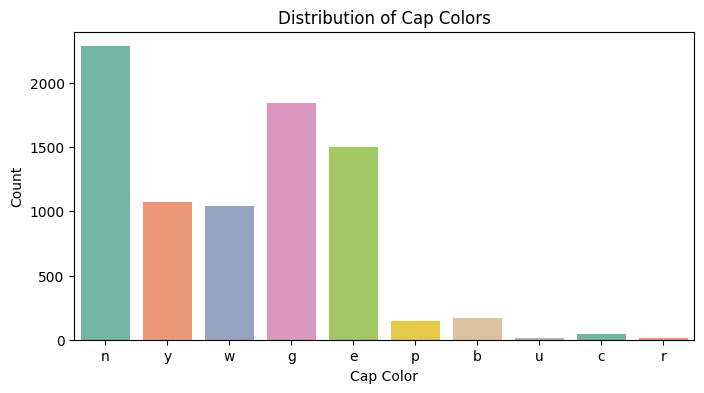

In [ ]:
# Visualizing the distribution of cap color
plt.figure(figsize=(8, 4))
sns.countplot(x="cap-color", data=mushrooms_df, palette="Set2")
plt.title("Distribution of Cap Colors")
plt.xlabel("Cap Color")
plt.ylabel("Count")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
le = LabelEncoder()
for column in mushrooms_df.columns:
    mushrooms_df[column] = le.fit_transform(mushrooms_df[column])

# Display the first few rows after encoding
print(mushrooms_df.head())

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

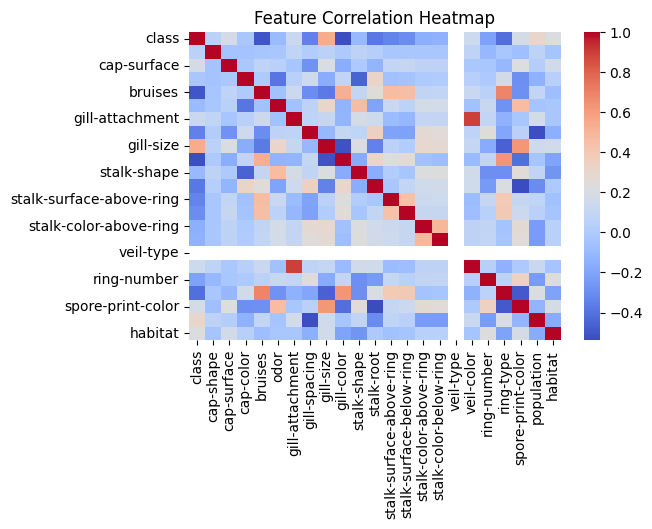

In [ ]:
# Plot heatmap to see feature correlations
plt.figure(figsize=(6, 4))
sns.heatmap(mushrooms_df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

Importing Necessary Libraries

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

Using Machine Leraning Algorithms

In [ ]:
# Split the dataset into features (x) and target (y)
x = mushrooms_df.drop('class', axis=1)
y = mushrooms_df['class']
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize models
models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Calculate and print metrics
    print(f"{name}:")
    print(f"  Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"  Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"  Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"  F1-Score: {f1_score(y_test, y_pred):.4f}")
    print()

Gaussian Naive Bayes:
  Accuracy: 0.9295
  Precision: 0.9279
  Recall: 0.9263
  F1-Score: 0.9271

Random Forest:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Decision Tree:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Logistic Regression:
  Accuracy: 0.9491
  Precision: 0.9521
  Recall: 0.9424
  F1-Score: 0.9472

SVC:
  Accuracy: 0.9893
  Precision: 0.9974
  Recall: 0.9805
  F1-Score: 0.9889

KNN:
  Accuracy: 0.9959
  Precision: 0.9924
  Recall: 0.9992
  F1-Score: 0.9958

XGBoost:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

